In [1]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.5, 7.5) # set default size of plots

%load_ext autoreload
%autoreload 2

In [6]:
model_data = {}

for filename in os.listdir("./checkpoints/"):
    full_path = "./checkpoints/" + filename
    model_name = filename.split(".")[0]
    
    model_dict = {}
    if ('txt' not in filename):
        continue
        
    with open(full_path, 'r') as data:
        model_dict["train_loss"] = [ float(val) for val in data.readline().split()[:20] ]
        model_dict["val_loss"] = [ float(val) for val in data.readline().split()[:20] ]
        model_dict["train_acc"] = [ float(val) for val in data.readline().split()[:20] ]
        model_dict["val_acc"] = [ float(val) for val in data.readline().split()[:20] ]
    model_data[model_name] = model_dict

0.950958333333
0.6535


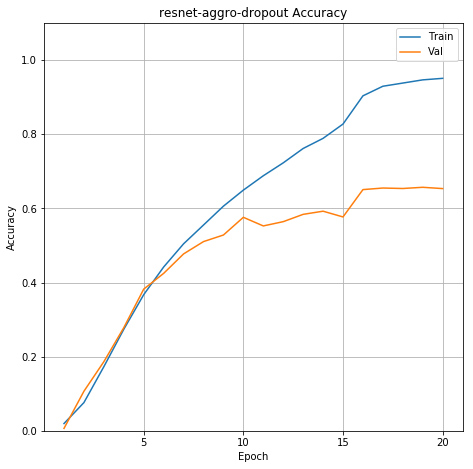

1.0
0.6515


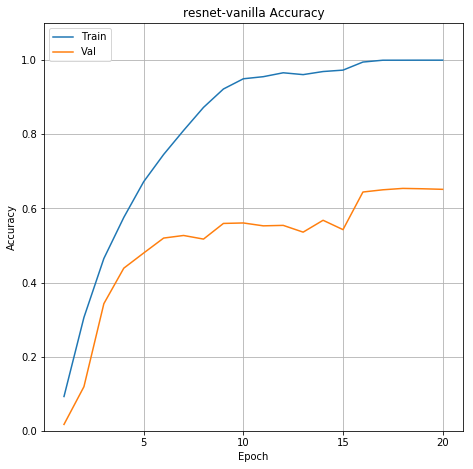

0.997166666667
0.656


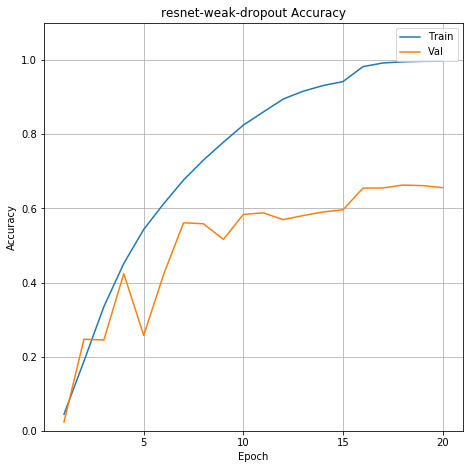

0.921125
0.6395


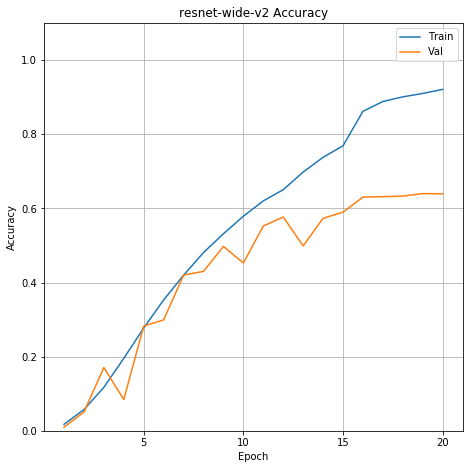

0.978541666667
0.653


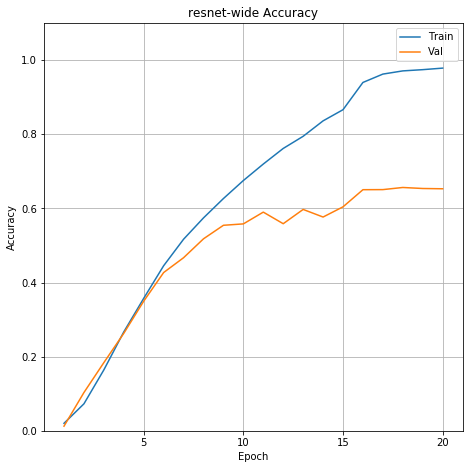

0.712708333333
0.58825


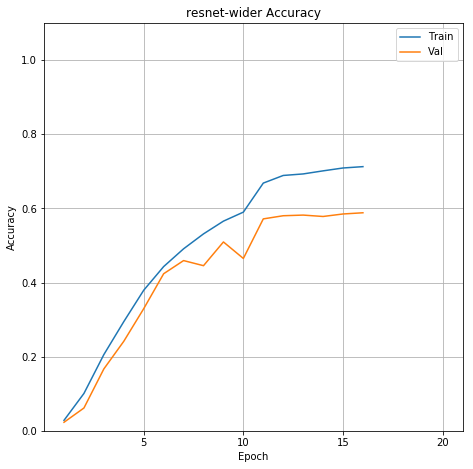

0.708666666667
0.558


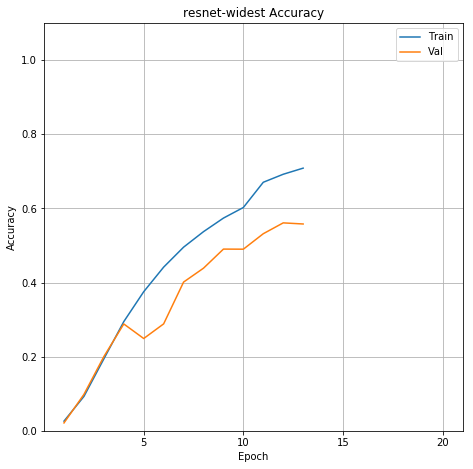

0.953375
0.6205


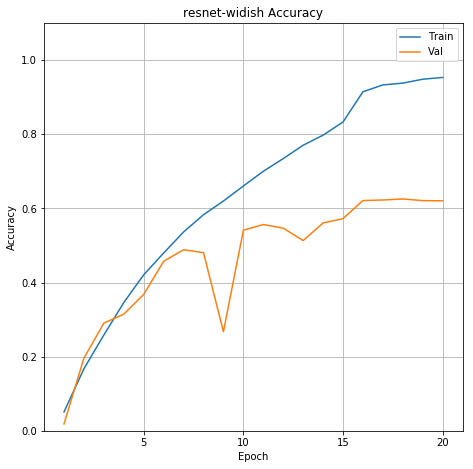

In [14]:
for model_name in model_data:
    model_dict = model_data[model_name]
    
    num_epochs = len(model_dict["train_loss"])
    
    """
    plt.plot(range(1, 21), model_dict["train_loss"], label='Train')
    plt.plot(range(1, 21), model_dict["val_loss"], label='Val')
    plt.axis([0, 21, 0, 10])
    plt.xticks([5, 10, 15, 20])
    plt.grid(True)
    plt.title('{} Loss'.format(model_name))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    """

    plt.plot(range(1, num_epochs + 1), model_dict["train_acc"], label='Train')
    print(model_dict["train_acc"][-1])
    plt.plot(range(1, num_epochs + 1), model_dict["val_acc"], label='Val')
    print(model_dict["val_acc"][-1])
    plt.axis([0, 21, 0, 1.1])
    plt.xticks([5, 10, 15, 20])
    plt.grid(True)
    plt.title('{} Accuracy'.format(model_name))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.savefig('Resnet_graphs_model%s.png' %model_name ) 
    plt.show()
    

In [15]:
#assemble of graphs 


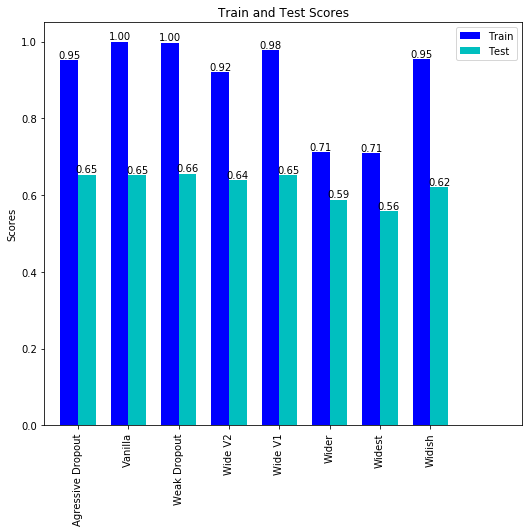

In [47]:
#bar plot of all models 

"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
import numpy as np
import matplotlib.pyplot as plt

N = 8

train = (0.950958333333, 1.0, 0.997166666667, 0.921125, 0.978541666667, 0.712708333333, 0.708666666667, 0.953375)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, train, width, color='b')

validation= (0.6535, 0.6515, 0.656, 0.6395, 0.653,0.58825, 0.558, 0.6205 )
rects2 = ax.bar(ind + width,validation, width, color='c')

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Train and Test Scores')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels((('Agressive Dropout', 'Vanilla', 'Weak Dropout', 'Wide V2', 'Wide V1', 'Wider', 'Widest', 'Widish') ), rotation='vertical')   
ax.set_xlim(-.5, N + 1)
ax.legend((rects1[0], rects2[0]), ('Train', 'Test'), loc="upper right")


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%0.2f' % (height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.savefig('Resnet_combo_graphs.pdf' ) 
plt.show()

In [33]:
model_data.keys()

dict_keys(['resnet-aggro-dropout', 'resnet-vanilla', 'resnet-weak-dropout', 'resnet-wide-v2', 'resnet-wide', 'resnet-wider', 'resnet-widest', 'resnet-widish'])

0.950958333333
1.0
0.997166666667
0.921125
0.978541666667
0.712708333333
0.708666666667
0.953375


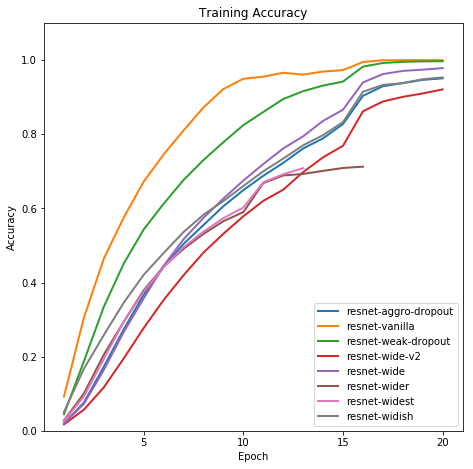

In [85]:
for model_name in model_data:
    model_dict = model_data[model_name]
    
    num_epochs = len(model_dict["train_loss"])
    
    """
    plt.plot(range(1, 21), model_dict["train_loss"], label='Train')
    plt.plot(range(1, 21), model_dict["val_loss"], label='Val')
    plt.axis([0, 21, 0, 10])
    plt.xticks([5, 10, 15, 20])
    plt.grid(True)
    plt.title('{} Loss'.format(model_name))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    """
    
    
    plt.plot(range(1, num_epochs + 1), model_dict["train_acc"], label='%s' % model_name, linewidth=2)
    print(model_dict["train_acc"][-1])
    
    #plt.plot(range(1, num_epochs + 1), model_dict["val_acc"], label='%s' % model_name)
    #print(model_dict["val_acc"][-1])


plt.axis([0, 21, 0, 1.1])
plt.xticks([5, 10, 15, 20])
#plt.grid(True)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Resnet_graphs_model_train.pdf' ) 
plt.show()

0.6535
0.6515
0.656
0.6395
0.653
0.58825
0.558
0.6205


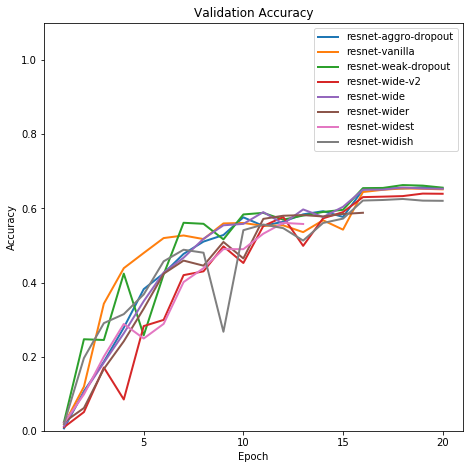

In [86]:
for model_name in model_data:
    model_dict = model_data[model_name]
    
    num_epochs = len(model_dict["train_loss"])
    
    """
    plt.plot(range(1, 21), model_dict["train_loss"], label='Train')
    plt.plot(range(1, 21), model_dict["val_loss"], label='Val')
    plt.axis([0, 21, 0, 10])
    plt.xticks([5, 10, 15, 20])
    plt.grid(True)
    plt.title('{} Loss'.format(model_name))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    """
    
    
    #plt.plot(range(1, num_epochs + 1), model_dict["train_acc"], label='Train')
    #print(model_dict["train_acc"][-1])
    
    plt.plot(range(1, num_epochs + 1), model_dict["val_acc"], label='%s' % model_name, linewidth=2)
    print(model_dict["val_acc"][-1])


plt.axis([0, 21, 0, 1.1])
plt.xticks([5, 10, 15, 20])
#plt.grid(True)
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Resnet_graphs_model_validation.pdf' ) 
plt.show()